## Iris Classification Model 

In [80]:
import pandas as pd 
import numpy as np 

In [81]:
df = pd.read_csv('iris.csv')

In [82]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
df.shape

(150, 6)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [85]:
# As you see our datatypes is already perfect and there is no null value in our dataset 

In [86]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [87]:
df.columns = df.columns.str.strip().str.lower()

In [88]:
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Bi-variate analysis 

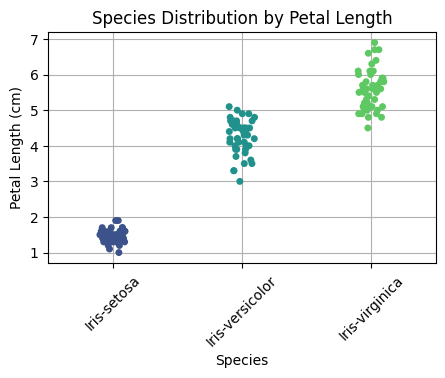

In [90]:
plt.figure(figsize=(5,3))
sns.stripplot(y='petallengthcm', x='species', hue='species' , data=df, jitter=True, palette='viridis')
plt.title('Species Distribution by Petal Length')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

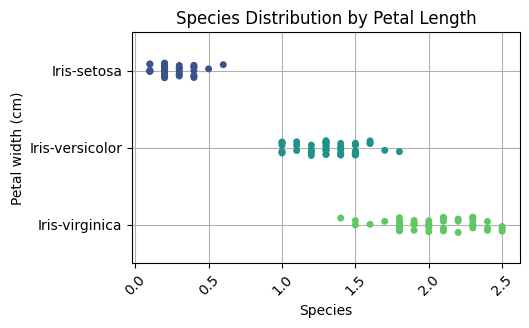

In [91]:
plt.figure(figsize=(5,3))
sns.stripplot(x='petalwidthcm', y='species', hue='species' ,  data=df, jitter=True, palette='viridis')
plt.title('Species Distribution by Petal Length')
plt.xlabel('Species')
plt.ylabel('Petal width (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

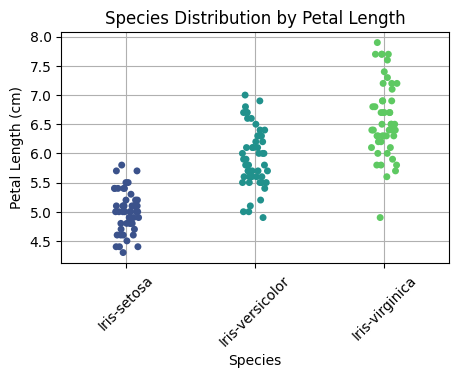

In [92]:
plt.figure(figsize=(5,3))
sns.stripplot(y='sepallengthcm', x='species', hue='species' , data=df, jitter=True, palette='viridis')
plt.title('Species Distribution by Petal Length')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

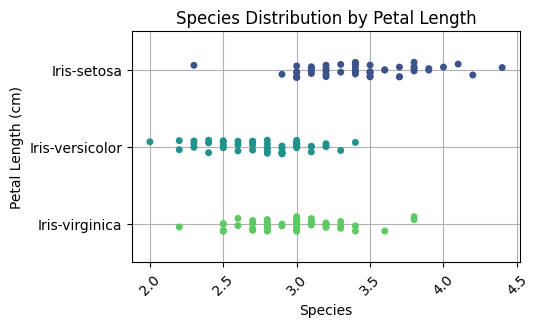

In [93]:
plt.figure(figsize=(5,3))
sns.stripplot(x='sepalwidthcm', y='species', hue='species', data=df, jitter=True, palette='viridis')
plt.title('Species Distribution by Petal Length')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
df = df.drop('id', axis=1)

# Split dataset into features and target
X = df.drop('species', axis=1)
y = df['species']

# Encoding target variable
y = pd.Categorical(y).codes

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Apply PCA to reduce dimensionality to 2 features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [103]:
# Training SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True)

In [104]:
# Predict on test set
y_pred = svm.predict(X_test_pca)
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [110]:
# Prediction function
import warnings
warnings.filterwarnings('ignore')
def predict_iris():
    # Input sepal length, sepal width, petal length, aur petal width
    sepal_length = float(input("Enter Sepal Length (cm): "))
    sepal_width = float(input("Enter Sepal Width (cm): "))
    petal_length = float(input("Enter Petal Length (cm): "))
    petal_width = float(input("Enter Petal Width (cm): "))

    # Standardizing input
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    
    # Standardizing input
    input_data = scaler.transform(input_data)
    
    # Applying PCA
    input_data_pca = pca.transform(input_data)
    
    # Making prediction
    prediction = svm.predict(input_data_pca)
    
    # Returning species
    if prediction[0] == 0:
        return "Iris-setosa"
    elif prediction[0] == 1:
        return "Iris-versicolor"
    else:
        return "Iris-virginica"


# Call prediction function
predicted_species = predict_iris()
print("Predicted Species:", predicted_species)

Enter Sepal Length (cm):  8
Enter Sepal Width (cm):  7
Enter Petal Length (cm):  6
Enter Petal Width (cm):  9


Predicted Species: Iris-virginica
